In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [77]:
df = pd.read_csv("./data/bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [78]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [79]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [80]:
df.shape

(13320, 9)

In [81]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [83]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [84]:
df = df.drop(['area_type', 'availability', 'society'], axis=1)
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [85]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [86]:
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

In [87]:
df.dropna(inplace=True, axis=0)

In [88]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [89]:
df['bhk']  = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [90]:
df.head(10)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,1.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,2.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,2.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,1.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,2.0,370.00,6


In [91]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [92]:
df[ df['bhk'] > 20 ]  # there seems problem in this column let's explore it a bit more.

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [93]:
df['total_sqft'].unique()  # This column contains a range of values, let's take the average of that cell

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [94]:
def is_float(x):

    try:
        float(x)
    except:
        return False
    return True
            

In [95]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,2.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [96]:
def convert_sqft_to_num(x):

    tokens = x.split('-')

    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None
        

In [97]:
convert_sqft_to_num("5050 - 1010")

3030.0

In [98]:
(5050 + 1010) / 2

3030.0

In [99]:
convert_sqft_to_num("34.46Sq. Meter")

In [100]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [101]:
df.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [102]:
"""  
This is the example index consist of values in range (2100 - 2850)
"""
df.iloc[30]  

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

## **Feature Engineering And Dimensionality Reduction**

In [103]:
df.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


let's create price per sqft column which will represent price per sqft

In [104]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


Let's explore the location column: i:e how many different type of locations are there, It is a categorical feature with more than 1300 different values.It is not possible to convert all of these variable to dummy variabels(ONE HOT ENCODING) because it will increase the dimension of our dataset which is called CURSE of dimensionality. 

In [105]:
len(df['location'].unique())

1304

In [106]:
df['location'].value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

#### **The above value counts shows that each location has appeared that number of times  in the dataset.**
#### **One technique we can use is all those locations which has appeared less than 10 times in a dataset we will name it as 'other'**

In [107]:
df['location'] = df['location'].apply(lambda x: x.strip())

location_stats = df.groupby('location')['location'].count().sort_values(ascending=False)

location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [108]:
"""   
We have come to this threshold that any location which has less than 10 datapoints will be named as 'other'
"""

len(location_stats[location_stats<=10]) # Number of locations with <=10 data

1052

In [109]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [110]:
type(location_stats_less_than_10)

pandas.core.series.Series

In [111]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [112]:
len(df['location'].unique())

242

### **Outlier Detection And Removal**

 
MEAN , MEDIAN, MODE : 
    Are the measures of center

RANGE, STANDARD DEVIATION:
    Measure of spread
   
Suppose we have talked to the bussiness or domain expert and he told us there must be only one BEDROOM in 300 sqft area, if there are more than 1 bedroom in 300 sqft its mean it is an error or outlier.

for Example :
   if area is 1000 sqft and bedroom are 3  then it will be a small house. and it is correct data point
   because if we divide 1000sqft / 3 it goes somewhere around 300 per sqft.


In [113]:
df.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,2.0,370.00,6,36274.509804


In [114]:
df[df['total_sqft'] / df['bhk'] <300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [115]:
df.shape

(13246, 8)

In [116]:
df = df[~(df['total_sqft'] / df['bhk'] <300)]
df.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [117]:
df.shape

(12502, 8)

In [118]:
"""
we can see below this column has also some anamolies;
1) min : 267 ruppe
        It is not possible to have sqft price 267.
2) max : 176470
        This is also not possible to have such a high value price for a sqft area
""" 
df['price_per_sqft'].describe()  

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### This function will remove the outliers in the price per sqft column and will make the column normally distributed, by applying the below formulas

In [119]:
def remove_pps_outliers(df):

    df_out = pd.DataFrame()

    for key, sub_df in df.groupby('location'):

        m = np.mean(sub_df['price_per_sqft'])
        std = np.std(sub_df['price_per_sqft'])

        reduced_df = sub_df[ (sub_df['price_per_sqft'] > (m-std))  & (sub_df['price_per_sqft'] <= (m + std)) ]

        df_out = pd.concat([df_out, reduced_df], ignore_index=True)

    return df_out

In [120]:
df = remove_pps_outliers(df)
df.shape

(10241, 8)

Now there is another problem has been identified and the problem is :

In few datapoints, the house having 2 bedrooms and 3 bedrooms has same prices, which is not possible ! RIGHT it could be due to many reasons.

Let's explore this behaviour via visualization.

In [121]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (In Ruppees)")
    plt.title(location)
    plt.legend()

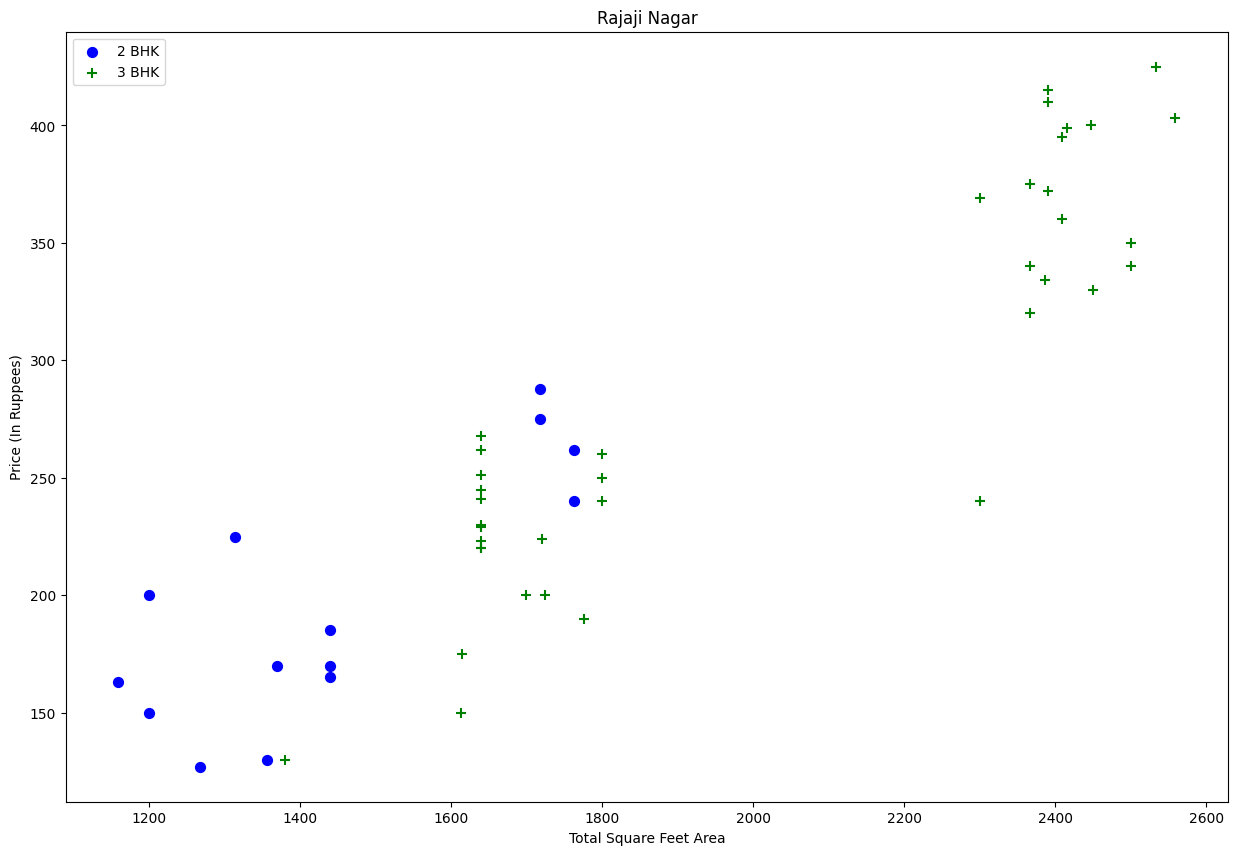

In [122]:
plot_scatter_chart(df,"Rajaji Nagar")

This plot shows the 2 bedrooms and 3 bedrooms apartments having almost the same prices

In [123]:
"""  
We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
"""

"  \nWe should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.\n\n{\n    '1' : {\n        'mean': 4000,\n        'std: 2000,\n        'count': 34\n    },\n    '2' : {\n        'mean': 4300,\n        'std: 2300,\n        'count': 22\n    },    \n}\nNow we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment\n"

In [124]:
def remove_bhk_outliers(df):

    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [125]:
df = remove_bhk_outliers(df)
df.shape

(7329, 8)

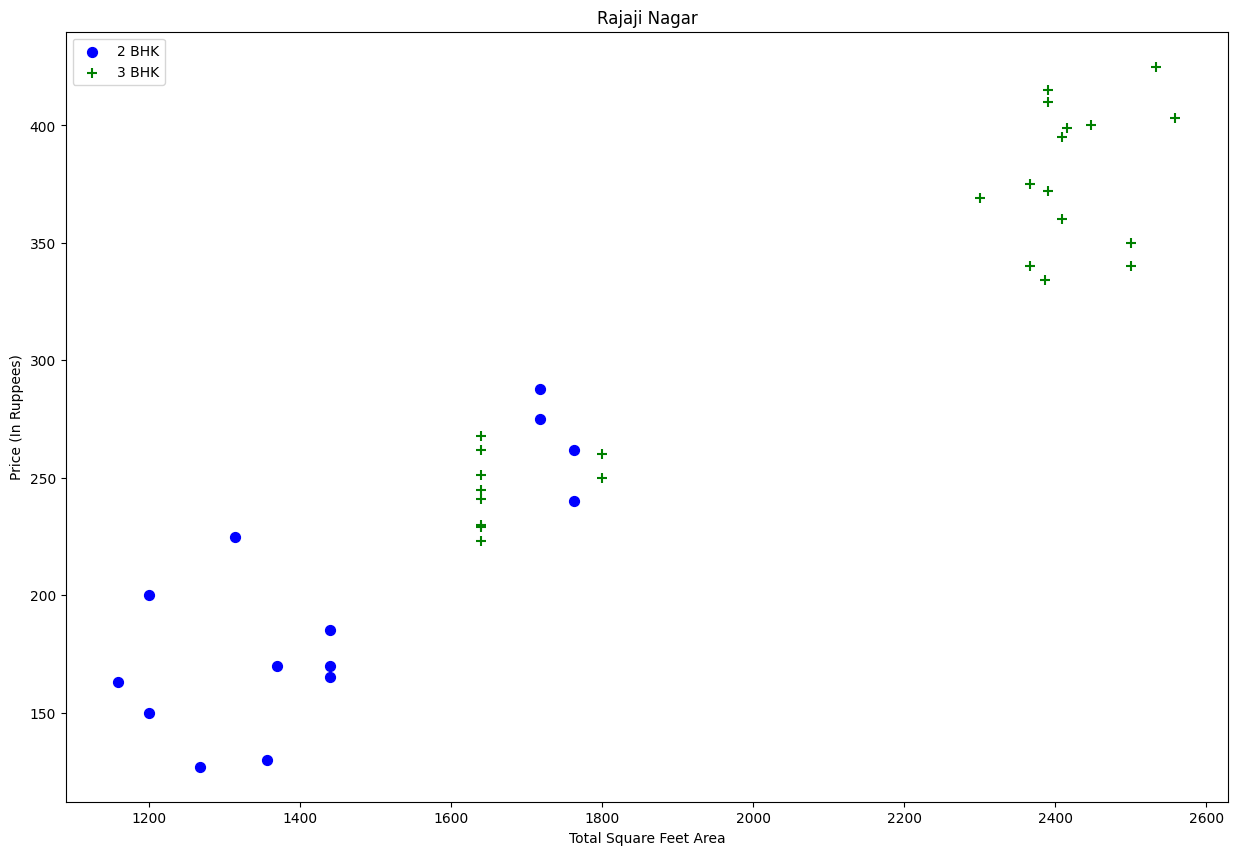

In [126]:
plot_scatter_chart(df, "Rajaji Nagar")

Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

### Before and after outlier removal: Rajaji Nagar

<img src = "image1.jpeg" >

### Before and after outlier removal: Hebbal

<img src="2.jpeg" >

In [127]:
df.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


Text(0, 0.5, 'Count')

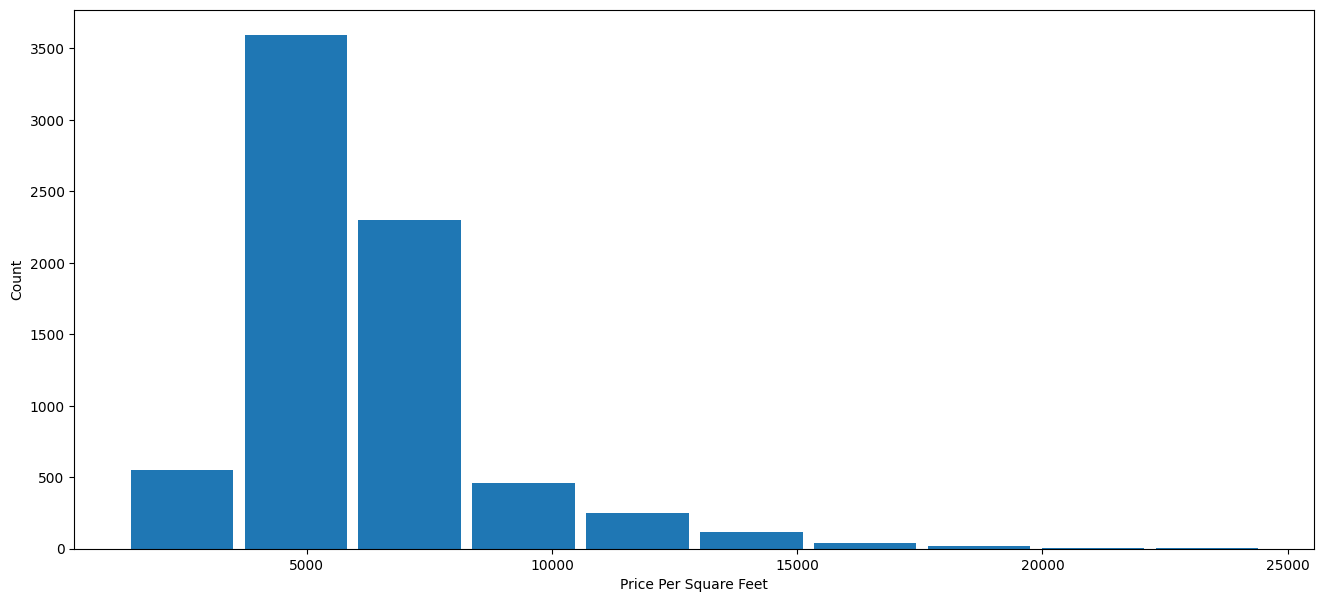

In [128]:
plt.figure(figsize=(16, 7))

plt.hist(df['price_per_sqft'], rwidth=0.9)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Outlier Removal Using Bathrooms Feature

In [129]:
df['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0.5, 0, 'Number of bathrooms')

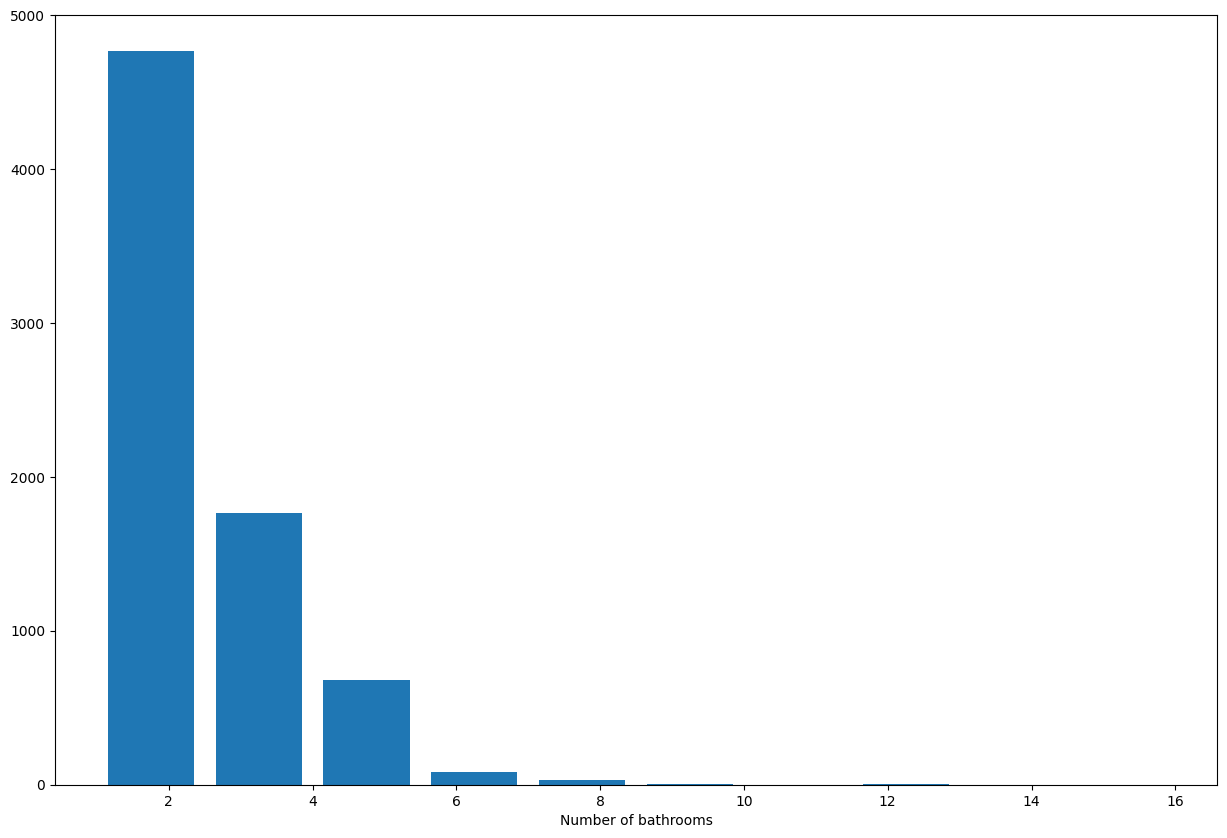

In [130]:
plt.hist(df['bath'], rwidth=0.8)
plt.xlabel('Number of bathrooms')


In [131]:
# Look at the data below and observe :
# If there are 12 bedrooms(bhk) then there must be 12 bathrooms, why 12 ? how 2 extra ? its mean it is outliers
df[df['bath'] > 10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [132]:
df[df['bath'] > df['bhk'] + 2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [133]:
df = df[df.bath < df.bhk+2]
df.shape

(7251, 8)

In [134]:
df.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [135]:
df = df.drop(['size','price_per_sqft', 'balcony'], axis='columns')
df.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


## **Building Machine Learning Model**

### 1) One Hot Encoding

In [136]:
dummies = pd.get_dummies(df['location'], drop_first=True)
dummies.head()

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [137]:
df = pd.concat([df, dummies], axis=1)
df.head()

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [138]:
df.shape

(7251, 246)

In [139]:
df.drop('location', axis = 1, inplace = True)

In [140]:
df.head(2)

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [141]:
X = df.drop('price', axis = 1)
y = df['price']

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression(fit_intercept=False)

lr_clf.fit(X_train, y_train)

lr_clf.score(X_test, y_test)  

0.8725697828753003

#### Being a data scientist we want to try couple of more models to check if there is anyone else who can perform better than this model.

#### For this we have a technique called gridSearchCv

##### **K-fold cross-validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds. The model is trained and evaluated k times, using a different fold as the validation set each time. Performance metrics from each fold are averaged to estimate the model's generalization performance.**

In [146]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) 
    
cross_val_score(LinearRegression(), X=X, y=y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

## **Find Best Model Using GridSearchCv**

#### **What is GridSearchCV used for?**
##### GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It’s essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [149]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

c:\softwares\python 3.11.5\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\softwares\python 3.11.5\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\softwares\python 3.11.5\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\softwares\python 3.11.5\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\softwares\python 3.11.5\Lib\site

,model,best_score,best_params
0,linear_regression,0.818354,{}
1,lasso,0.699273,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.764099,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [150]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=244)

In [151]:
loc_index = np.where(X.columns == '2nd Stage Nagarbhavi')[0][0]
loc_index

5

In [152]:
def predict_price(location, sqft,  bath, bhk):

    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))

    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [154]:
predict_price("1st Phase JP Nagar", 1000, 2, 2)

c:\softwares\python 3.11.5\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.9512619944236

In [85]:
predict_price("1st Phase JP Nagar", 1000, 2, 3)

c:\softwares\python 3.11.5\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.22846912267052

In [88]:
predict_price("Vishwapriya Layout", 2000, 3, 3)

c:\softwares\python 3.11.5\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


132.30395983932314

## Save The Model In Pickle File And Model Parameters In JSON Formate 

In [89]:
import pickle

with open('house_price_predictions.pickle', 'wb') as f:
    # Save the model to disk
    pickle.dump(lr_clf, f)

In [91]:
import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))